In [5]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [2]:
songs=pd.read_csv('spotify_cleaned.csv')

In [3]:
songs.head(5)

Unnamed: 0.1  Unnamed: 0          artist_name         track_name  \
0          1044        1044  Menahan Street Band  Seven Is the Wind   
1       1130163     1424053            Flatsound         We'll Live   
2        927251     1121151              Subhira      Ruta del Inca   
3        275932      275932        Scary Pockets         Wonderwall   
4        834627      981623    Pain of Salvation        Iter Impius   

                 track_id  popularity  year     genre  danceability  energy  \
0  5qh2fad21W9se0d4IpKcyi          22  2012  afrobeat         0.525   0.577   
1  1XuAT2hAkjDvGqd4MMv2wL          16  2011       emo         0.339   0.624   
2  0ID7odbzAGY7C9cP2PzLRX           0  2007  afrobeat         0.552   0.766   
3  120tmueqvWTGdHET4u5sPP          36  2017      funk         0.756   0.732   
4  12kxpEvK9B99z02rNRmnSF          26  2004   swedish         0.437   0.584   

   ...  speechiness  acousticness  instrumentalness  liveness  valence  \
0  ...       0.0334         0.223          0.877000    0.1850    0.391   
1  ...       0.0441         0.804          0.000004    0.1030    0.345   
2  ...       0.0364         0.015          0.842000    0.1110    0.266   
3  ...       0.0748         0.181          0.000122    0.1900    0.958   
4  ...       0.0329         0.386          0.000000    0.0916    0.188   

     tempo  duration_ms  time_signature  pop_bucket  decade  
0   78.298       308693               4           4   2010s  
1  120.558       132056               4           4   2010s  
2  119.998       203360               4           4   2000s  
3   82.891       222000               4           4   2010s  
4  135.836       381000               4           4   2000s  

[5 rows x 23 columns]

In [8]:
songs['pop_bucket'].value_counts()

pop_bucket
4    205278
3    117426
2     15845
1       105
Name: count, dtype: int64

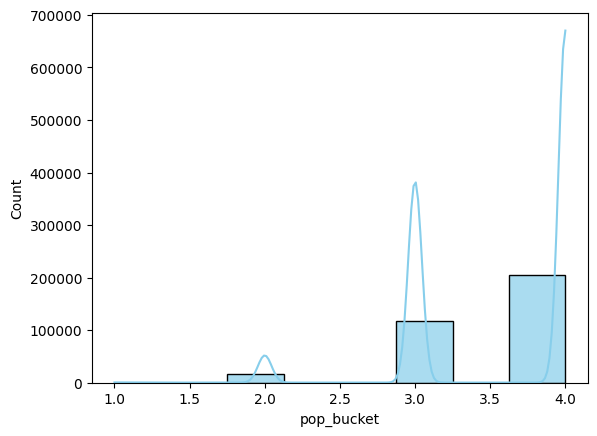

In [7]:
pop_dist=sns.histplot(songs['pop_bucket'], kde=True, bins=8, color="skyblue", edgecolor="black", alpha=0.7)

In [11]:
onehot=pd.get_dummies(data=songs,columns=['genre','decade'])

In [44]:
onehot.describe()

Unnamed: 0.1    Unnamed: 0     popularity           year  \
count  3.386540e+05  3.386540e+05  338654.000000  338654.000000   
mean   5.516748e+05  6.176482e+05      28.150880    2013.277782   
std    3.177507e+05  4.068599e+05      19.990314       6.844160   
min    0.000000e+00  0.000000e+00       0.000000    2000.000000   
25%    2.955682e+05  2.955682e+05       9.000000    2008.000000   
50%    5.244480e+05  5.244480e+05      28.000000    2014.000000   
75%    8.132598e+05  9.463798e+05      45.000000    2019.000000   
max    1.159759e+06  1.473391e+06     100.000000    2023.000000   

        danceability         energy            key       loudness  \
count  338654.000000  338654.000000  338654.000000  338654.000000   
mean        0.556694       0.638917       5.287925      -8.597162   
std         0.180303       0.260789       3.558894       5.546642   
min         0.000000       0.000000       0.000000     -58.100000   
25%         0.439000       0.467000       2.000000     -10.195000   
50%         0.571000       0.687000       5.000000      -7.107000   
75%         0.692000       0.859000       8.000000      -5.107000   
max         0.990000       1.000000      11.000000       6.172000   

                mode    speechiness   acousticness  instrumentalness  \
count  338654.000000  338654.000000  338654.000000     338654.000000   
mean        0.626492       0.092065       0.311053          0.212207   
std         0.483736       0.117594       0.341837          0.346347   
min         0.000000       0.000000       0.000000          0.000000   
25%         0.000000       0.036900       0.010400          0.000000   
50%         1.000000       0.050700       0.151000          0.000321   
75%         1.000000       0.091200       0.592000          0.357000   
max         1.000000       0.969000       0.996000          1.000000   

            liveness        valence          tempo   duration_ms  \
count  338654.000000  338654.000000  338654.000000  3.386540e+05   
mean        0.213839       0.460242     121.391086  2.384584e+05   
std         0.190562       0.261080      29.734822  1.302619e+05   
min         0.000000       0.000000       0.000000  4.000000e+03   
25%         0.097900       0.241000      98.302000  1.785230e+05   
50%         0.131000       0.446000     121.564000  2.182400e+05   
75%         0.276000       0.669000     139.972000  2.706705e+05   
max         1.000000       0.999000     249.898000  5.282509e+06   

       time_signature     pop_bucket  
count   338654.000000  338654.000000  
mean         3.896682       3.558750  
std          0.446293       0.584796  
min          0.000000       1.000000  
25%          4.000000       3.000000  
50%          4.000000       4.000000  
75%          4.000000       4.000000  
max          5.000000       4.000000

In [ ]:
correlation_matrix=onehot.drop(columns=['artist_name', 'track_name', 'track_id','Unnamed: 0.1','Unnamed: 0','popularity','year']).corr()
correlation_pairs=correlation_matrix.unstack()
sorted_pairs=correlation_pairs.abs().sort_values(ascending=False)
sorted_pairs=sorted_pairs[sorted_pairs < 1]
top_pairs=sorted_pairs.head(30)
bottom_pairs=sorted_pairs.tail(30)
top_df=pd.DataFrame(top_pairs).reset_index()
top_df.columns=['Feature 1', 'Feature 2', 'Correlation']
bottom_df=pd.DataFrame(bottom_pairs).reset_index()
bottom_df.columns=['Feature 1', 'Feature 2', 'Correlation']
pivot=top_df.pivot(index='Feature 1',columns='Feature 2',values='Correlation')

In [93]:
pd.DataFrame(sorted_pairs['pop_bucket']).head(10)

0
decade_2020s      0.265267
decade_2000s      0.252241
genre_hip-hop     0.223762
genre_pop         0.219610
instrumentalness  0.203974
genre_dance       0.201494
danceability      0.187266
duration_ms       0.140915
genre_alt-rock    0.127679
loudness          0.122690

In [41]:
pivot

Feature 2         acousticness  danceability  decade_2000s  decade_2010s  \
Feature 1                                                                  
acousticness               NaN           NaN           NaN           NaN   
danceability               NaN           NaN           NaN           NaN   
decade_2000s               NaN           NaN           NaN      0.607898   
decade_2010s               NaN           NaN      0.607898           NaN   
decade_2020s               NaN           NaN      0.378888      0.504490   
energy                0.747133           NaN           NaN           NaN   
genre_classical            NaN           NaN           NaN           NaN   
genre_comedy               NaN           NaN           NaN           NaN   
genre_sleep                NaN           NaN           NaN           NaN   
instrumentalness           NaN           NaN           NaN           NaN   
loudness              0.623912      0.277023           NaN           NaN   
speechiness                NaN           NaN           NaN           NaN   
valence                    NaN      0.498827           NaN           NaN   

Feature 2         decade_2020s    energy  genre_classical  genre_comedy  \
Feature 1                                                                 
acousticness               NaN  0.747133              NaN           NaN   
danceability               NaN       NaN              NaN           NaN   
decade_2000s          0.378888       NaN              NaN           NaN   
decade_2010s          0.504490       NaN              NaN           NaN   
decade_2020s               NaN       NaN              NaN           NaN   
energy                     NaN       NaN              NaN           NaN   
genre_classical            NaN       NaN              NaN           NaN   
genre_comedy               NaN       NaN              NaN           NaN   
genre_sleep                NaN       NaN              NaN           NaN   
instrumentalness           NaN       NaN              NaN           NaN   
loudness                   NaN  0.775259         0.276192           NaN   
speechiness                NaN       NaN              NaN      0.587434   
valence                    NaN  0.276202              NaN           NaN   

Feature 2         genre_sleep  instrumentalness  loudness  speechiness  \
Feature 1                                                                
acousticness              NaN               NaN  0.623912          NaN   
danceability              NaN               NaN  0.277023          NaN   
decade_2000s              NaN               NaN       NaN          NaN   
decade_2010s              NaN               NaN       NaN          NaN   
decade_2020s              NaN               NaN       NaN          NaN   
energy                    NaN               NaN  0.775259          NaN   
genre_classical           NaN               NaN  0.276192          NaN   
genre_comedy              NaN               NaN       NaN     0.587434   
genre_sleep               NaN               NaN  0.363599          NaN   
instrumentalness          NaN               NaN  0.450633          NaN   
loudness             0.363599          0.450633       NaN          NaN   
speechiness               NaN               NaN       NaN          NaN   
valence                   NaN          0.306538  0.310266          NaN   

Feature 2          valence  
Feature 1                   
acousticness           NaN  
danceability      0.498827  
decade_2000s           NaN  
decade_2010s           NaN  
decade_2020s           NaN  
energy            0.276202  
genre_classical        NaN  
genre_comedy           NaN  
genre_sleep            NaN  
instrumentalness  0.306538  
loudness          0.310266  
speechiness            NaN  
valence                NaN

In [42]:
top_15=top_df.iloc[::2]

In [43]:
top_15

Feature 1        Feature 2  Correlation
0           loudness           energy     0.775259
2       acousticness           energy     0.747133
4           loudness     acousticness     0.623912
6       decade_2010s     decade_2000s     0.607898
8        speechiness     genre_comedy     0.587434
10      decade_2010s     decade_2020s     0.504490
12      danceability          valence     0.498827
14  instrumentalness         loudness     0.450633
16      decade_2000s     decade_2020s     0.378888
18          loudness      genre_sleep     0.363599
20          loudness          valence     0.310266
22  instrumentalness          valence     0.306538
24      danceability         loudness     0.277023
26           valence           energy     0.276202
28          loudness  genre_classical     0.276192

In [87]:
bottom_df.iloc[::2]

Feature 1         Feature 2  Correlation
0         genre_sad             tempo     0.000283
2   genre_sertanejo    time_signature     0.000273
4               key  genre_psych-rock     0.000269
6      decade_2010s       genre_salsa     0.000259
8        genre_punk      decade_2000s     0.000252
10             mode  genre_industrial     0.000231
12  genre_punk-rock               key     0.000203
14  genre_hard-rock               key     0.000196
16              key     genre_hip-hop     0.000130
18  genre_power-pop               key     0.000112
20     decade_2020s   genre_punk-rock     0.000052
22     acousticness      genre_german     0.000036
24     genre_guitar       duration_ms     0.000023
26            tempo     genre_swedish     0.000014
28    genre_spanish              mode     0.000013

In [57]:
bucket_genres=songs.groupby('pop_bucket')['genre'].value_counts()

In [82]:
display(pd.DataFrame(bucket_genres[1]).head(10))

count
genre           
pop           41
hip-hop       20
dance         14
sad            6
k-pop          5
garage         3
indie-pop      3
sertanejo      3
country        2
folk           2

In [70]:
pd.set_option('display.max_rows', None)

In [83]:
display(pd.DataFrame(bucket_genres[2]).head(10))

count
genre           
hip-hop     2593
pop         2405
dance       2193
country      782
k-pop        703
alt-rock     693
indie-pop    585
sad          523
french       419
electro      383

In [84]:
display(pd.DataFrame(bucket_genres[3]).head(10))

count
genre           
alt-rock    8100
hip-hop     7996
dance       7894
chill       4525
k-pop       4463
country     4433
folk        4130
indie-pop   4085
french      3731
jazz        3316

In [85]:
display(pd.DataFrame(bucket_genres[4]).head(10))

count
genre             
black-metal   4386
gospel        4039
acoustic      3954
ambient       3933
new-age       3926
indian        3885
comedy        3868
blues         3671
forro         3647
dub           3596

In [76]:
bucket_artists=songs.groupby('pop_bucket')['artist_name'].value_counts()

In [77]:
bucket_artists

pop_bucket  artist_name                                                                
1           The Weeknd                                                                       7
            Eminem                                                                           4
            Arctic Monkeys                                                                   3
            Ed Sheeran                                                                       3
            Harry Styles                                                                     3
            NewJeans                                                                         3
            SZA                                                                              3
            Taylor Swift                                                                     3
            Bizarrap                                                                         2
            Bruno Mars                                   

In [78]:
display(pd.DataFrame(bucket_artists[1]).head(10))

count
artist_name          
The Weeknd          7
Eminem              4
Arctic Monkeys      3
Ed Sheeran          3
Harry Styles        3
NewJeans            3
SZA                 3
Taylor Swift        3
Bizarrap            2
Bruno Mars          2

In [79]:
display(pd.DataFrame(bucket_artists[2]).head(10))

count
artist_name          
Taylor Swift      176
Drake             146
BTS               117
$uicideboy$        72
Lana Del Rey       71
Eminem             70
Morgan Wallen      69
Pritam             62
Kendrick Lamar     59
The Weeknd         59

In [80]:
display(pd.DataFrame(bucket_artists[3]).head(10))

count
artist_name              
$uicideboy$           236
Pritam                194
Future                184
Hans Zimmer           173
TWICE                 144
Yuvan Shankar Raja    124
Jorge & Mateus        121
Boyce Avenue          119
Sleep Fruits Music    117
Eminem                116

In [81]:
display(pd.DataFrame(bucket_artists[4]).head(10))

count
artist_name                   
Traditional                820
Grateful Dead              460
Johann Sebastian Bach      397
Giacomo Meyerbeer          273
Elvis Presley              222
Armin van Buuren           211
Wolfgang Amadeus Mozart    194
Andrew Lloyd Webber        180
Andrei Krylov              176
Astor Piazzolla            160

In [99]:
songs[songs['popularity']>=85].sort_values(by='popularity')

Unnamed: 0.1  Unnamed: 0             artist_name  \
206077         12104       12104              Bruno Mars   
270280        461998      461998              The Weeknd   
270281        461999      461999              Fujii Kaze   
270286        462004      462004              Elley Duhé   
275523        487891      487891                Doja Cat   
280224        506685      506685           The Kid LAROI   
283683        515568      515568           Justin Bieber   
283684        515569      515569              Ed Sheeran   
283688        515573      515573         Stephen Sanchez   
284646        520494      520494              Peso Pluma   
310204        615627      615627                Junior H   
309836        612512      612512             Miley Cyrus   
290310        541590      541590                 Shakira   
302729        576555      576555       Israel & Rodolffo   
296544        560201      560201               Lil Nas X   
296884        560541      560541                    King   
299030        564147      564147               Jung Kook   
300674        569204      569204                    Joji   
270276        461994      461994              Conan Gray   
310419        617257      617257                AgroPlay   
283681        515566      515566             Nicky Youre   
237072        293464      293464            Taylor Swift   
216777        140597      140597                 TV Girl   
211235         77592       77592          Arctic Monkeys   
240901        321015      321015           Calvin Harris   
237085        293477      293477              Ed Sheeran   
227065        232723      232723                 Seafret   
231781        264770      264770            Shawn Mendes   
233430        272512      272512            XXXTENTACION   
292538        547736      547736          Wisin & Yandel   
315586        732741      825781                  Eminem   
211236         77593       77593          Arctic Monkeys   
217395        146771      146771           One Direction   
222848        197514      197514              The Weeknd   
289505        540766      540766              Zach Bryan   
306178        591083      591083             Niall Horan   
300663        569193      569193            Taylor Swift   
280217        506678      506678              Tory Lanez   
299025        564142      564142                NewJeans   
237640        297308      297308         Imagine Dragons   
301707        572948      572948         Imagine Dragons   
312149        645970      651395                  Eminem   
296525        560182      560182                   Drake   
301919        574170      574170           Fuerza Regida   
315584        732739      825779                  Eminem   
296546        560203      560203                Arcángel   
300708        569238      569238                    Feid   
216258        138937      138937                 J. Cole   
208256         40342       40342              Bruno Mars   
300666        569196      569196            Harry Styles   
246995        350203      350203           Billie Eilish   
300659        569189      569189                     SZA   
290308        541588      541588                 Shakira   
246993        350201      350201              The Weeknd   
308366        605184      605184         Cartel De Santa   
237073        293465      293465                 Ruth B.   
308361        605179      605179           The Kid LAROI   
237076        293468      293468              Ed Sheeran   
238344        304270      304270  White Noise Baby Sleep   
270275        461993      461993              The Weeknd   
256331        399063      399063                New West   
257952        406370      406370            Harry Styles   
305954        590794      590794           Morgan Wallen   
302728        576554      576554        Marília Mendonça   
290300        541580      541580       Sabrina Carpenter   
309308        608233      608233                